## FIFA 15~20 스탯별 데이터 분류하기

#### 모든 데이터는 kaggle에서 다운받은 데이터입니다.
#### 평소 즐겨하는 FIFA 게임의 선수 스탯만으로 포지션을 분류할 수 있을지, 검증해 보려 합니다.

### 1. 데이터 불러오기

FIFA 15~ 20 데이터를 모두 사용합니다.

데이터의 갯수는 약 12만개로, 이 중 다수는 중복되어 등장하나 매년 다른 스탯을 가진 선수입니다. 

따라서 다른 데이터로 볼 수 있습니다.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


file15 = pd.read_csv('players_15.csv')
file16 = pd.read_csv('players_16.csv')
file17 = pd.read_csv('players_17.csv')
file18 = pd.read_csv('players_18.csv')
file19 = pd.read_csv('players_19.csv')
file20 = pd.read_csv('players_20.csv')

df = pd.concat([file15,file16,file17,file18,file18,file19,file20])
df.shape

(118587, 104)

In [ ]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. 전처리 및 탐색적 데이터 분석

반응변수인 포지션을 설정합니다. FIFA에서 자체적으로 지정한 team_position 이라는 단일값 feature 값이 있지만,

데이터가 난잡하고 현실성이 떨어져 대신 FIFA에서 사용하는 **player_positions** 컬럼의 가장 앞 포지션을 사용하였습니다.

player_position 컬럼은 다음과 같이 이루어져 있습니다.

In [ ]:
df['player_positions'].head()

0            CF
1        LW, LM
2    RM, LM, RW
3            ST
4            GK
Name: player_positions, dtype: object

새로운 feature인 'position'을 생성하고, player_positions 컬럼의 가장 앞 값을 삽입하였습니다.

In [ ]:
df['position'] = 0
try:
  name = df['player_positions'].str.split(",")
  df['First_Position']= name.str.get(0)
except:
  df['First_Postion'] = df['player_positions']

정리된 포지션을 각각 골키퍼 0, 수비수 1, 미드필더 2, 공격수 3으로 분류하였습니다.

In [ ]:
def position(df):
    if df =='GK':
        return 0
    if df =='CB' or df =='RB' or df =='LB'or df =='LWB' or df =='RWB':
        return 1
    if df =='CDM' or df =='CM' or df =='LM'or df =='RM' or df =='CAM':
        return 2
    if df =='ST' or df =='LW' or df =='RW'or df =='CF':
        return 3

df['position'] = df['First_Position'].apply(position)

포지션별 선수의 수는 다음과 같습니다.

아래의 결과는 실제 축구 경기에서 필요로 하는 선수 구성과 유사한 경향성을 보입니다.

In [ ]:
df['position'].value_counts()

2    44324
1    38407
3    22630
0    13226
Name: position, dtype: int64

선수의 포지션 별 분류만을 위해, 기본적인 스탯값을 나타내는 feature 33개만 활용하였습니다.

또한 포지션별 스탯, 공격/수비/골키퍼 등 일부 스탯만을 활용한 스탯값 평균도 크게 의미가 있지 않을것 같아 제외했습니다.

In [ ]:
interest = ['attacking_crossing','attacking_finishing',
            'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
            'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
            'movement_acceleration','movement_sprint_speed','movement_agility',
            'movement_reactions','movement_balance','power_shot_power','power_jumping',
            'power_stamina','power_strength','power_long_shots','mentality_aggression',
            'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
            'defending_marking','defending_standing_tackle','defending_sliding_tackle',
            'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
            'goalkeeping_positioning','goalkeeping_reflexes']

data = df[interest]
y = df['position']
data.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,...,90,76,25,21,20,6,11,15,14,8
1,83,95+3,86,82,87+2,93+3,88,79,72,92-3,...,81,85,22,31,23,7,11,15,14,11
2,80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,...,84+2,80+1,29,26+2,26+1,10,8,11,5,15
3,76,91,76,84-2,92+3,88,80,80,76+4,90,...,83-1,91,25,41-8,27,13,15,10,9,12
4,25,25,25,42,25,25,25,25,41,31,...,20,37,25,25,25,87,85+3,92,90+6,86


일부 선수에게 적용된 94-3, 86+2 등 라이브 부스트(실제 선수의 활약상에 따른 스탯의 조정값)를 제거 후, 수치화 하였습니다.


In [ ]:

for i in range(int(len(data))):
  for j in range(int(len(data.columns))):
    try:
      data.iloc[i,j] = str(data.iloc[i,j]).split('-')[0]
      data.iloc[i,j] = str(data.iloc[i,j]).split('+')[0]
    except:
      pass

data = data.apply(pd.to_numeric)

---

분류 정확도를 높이기 위한 핵심은, 스탯간의 차이를 어떻게 좁히느냐에 있다고 저는 분석했습니다.

FIFA 게임은 상위 리그에서 뛰는 선수일수록 높은 스탯을 책정하는 경향이 있고, 이는 실제 선수 및 포지션과는 관련 없는 스탯이 높게 배정될 수도 있다는 사실을 의미합니다.

예를 들면, 최상위 리그에서 뛰는 엘링 홀란드 선수의 태클 능력치는 50보다 높게 책정되었지만, 하부 리그에서 뛰는 수비수 선수의 태클 능력치는 30보다 낮게 책정된 경우도 존재합니다.

그렇다면 홀란드 선수가 수비수로 분류될 수도 있습니다.

이는 분석의 정확도를 떨어뜨리는 문제로 작용할 것입니다.


이러한 문제를 해결하기 위해, 스탯을 하나의 flow로 만들어 절대적인 값보다, 상대적인 높낮이를 비교하고자 하였습니다.

한 선수 안에서의 데이터(row)만을 기준으로 standard scailing 하는 과정을 통해, 데이터는 일종의 경향성을 가지게 될 것입니다.

#### **절대적인 값은 낮더라도, 같은 포지션의 선수는 비슷한 경향성을 가지게 되는 것입니다.**

결과적으로 다음과 같은 상황을 얻고자 하였습니다.

예 - 메시 선수와 하부리그 공격수는 모두 수비스탯 값보다 공격스탯 값이 상대적으로 높아야 합니다.

예 - 테어 슈테겐 선수와과 하부리그 골키퍼는 모두 공격스탯 값보다 골키퍼 스탯이 상대적으로 높을 것으로 예상됩니다.

---

다음과 같이 standard scailing을 진행하고, 최종적으로 분석에 사용할 독립변수를 확정하였습니다.

In [ ]:
for i in range(int(len(data))): 
  mean = data.iloc[i,].mean()
  std = data.iloc[i,].std()
  for j in range(int(len(data.columns))):
    data.iloc[i,j] = (data.iloc[i,j] - mean)/std

In [ ]:
data.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.560019,0.864477,0.164223,0.712248,0.590465,0.925369,0.712248,0.742694,0.316452,0.925369,...,0.742694,0.316452,-1.236285,-1.358068,-1.388514,-1.814756,-1.662527,-1.540743,-1.571189,-1.753864
1,0.495762,0.870422,0.589427,0.464540,0.620649,0.807979,0.651870,0.370875,0.152324,0.776757,...,0.433319,0.558205,-1.408759,-1.127764,-1.377537,-1.877084,-1.752197,-1.627311,-1.658532,-1.752197
2,0.507486,0.669137,-0.462419,0.701467,0.701467,0.927778,0.669137,0.604476,0.378165,0.830788,...,0.636807,0.507486,-1.141353,-1.238344,-1.238344,-1.755627,-1.820287,-1.723296,-1.917277,-1.593976
3,0.372483,0.868127,0.372483,0.636826,0.901169,0.768998,0.504655,0.504655,0.372483,0.835084,...,0.603783,0.868127,-1.312703,-0.784017,-1.246618,-1.709218,-1.643132,-1.808347,-1.841389,-1.742261
4,-0.812365,-0.812365,-0.812365,-0.140187,-0.812365,-0.812365,-0.812365,-0.812365,-0.179727,-0.575126,...,-1.010064,-0.337886,-0.812365,-0.812365,-0.812365,1.639108,1.560028,1.836807,1.757727,1.599568


### 3. 머신러닝 및 모델링

연속형 데이터를 활용한 분류 문제이므로, RandomForest와 XGBoost를 활용하려 합니다.

머신러닝을 위해, 데이터를 분할합니다.

데이터의 수가 약 12만개 이므로, test size 비중을 낮추고 position 기준으로 균등하게 분할합니다.



In [ ]:
from sklearn.model_selection import train_test_split
pre_X_train, X_test, pre_y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(pre_X_train, pre_y_train, test_size=0.2, stratify=pre_y_train)

display(X_train.shape)
display(X_valid.shape)
display(X_test.shape)

(75895, 33)

(18974, 33)

(23718, 33)

RandomForest를 활용한 결과입니다.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(pre_X_train, pre_y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print()
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2645
           1       0.96      0.97      0.97      7682
           2       0.92      0.94      0.93      8865
           3       0.93      0.88      0.91      4526

    accuracy                           0.94     23718
   macro avg       0.95      0.95      0.95     23718
weighted avg       0.94      0.94      0.94     23718


[[2645    0    0    0]
 [   0 7436  245    1]
 [   0  270 8295  300]
 [   0   10  522 3994]]


RandomForest의 분류가 어떤 feature를 중심으로 이루어졌는지 시각화하면, 다음과 같습니다.

가장 분류에서 많이 활용된 스탯으로는 주로 각 포지션에 특화된 스탯들이 뽑혔습니다.

반면, 중립적인 스탯들(스태미너, 멘탈리티 등)은 활용도가 비교적 낮았습니다.

변수 중요도(randomforest)
1. feature defending_sliding_tackle (0.109)
2. feature defending_marking (0.066)
3. feature attacking_finishing (0.063)
4. feature defending_standing_tackle (0.061)
5. feature mentality_interceptions (0.056)
6. feature skill_long_passing (0.054)
7. feature goalkeeping_handling (0.049)
8. feature mentality_vision (0.044)
9. feature goalkeeping_positioning (0.041)
10. feature attacking_crossing (0.039)
11. feature attacking_heading_accuracy (0.038)
12. feature goalkeeping_diving (0.037)
13. feature attacking_short_passing (0.036)
14. feature goalkeeping_reflexes (0.035)
15. feature power_long_shots (0.030)
16. feature skill_dribbling (0.029)
17. feature goalkeeping_kicking (0.026)
18. feature skill_ball_control (0.023)
19. feature mentality_positioning (0.020)
20. feature attacking_volleys (0.018)
21. feature mentality_penalties (0.014)
22. feature movement_reactions (0.013)
23. feature power_strength (0.011)
24. feature movement_sprint_speed (0.011)
25. feature skil

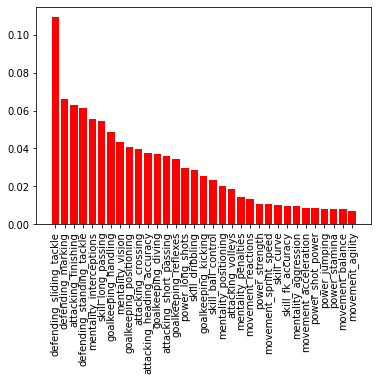

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("변수 중요도(randomforest)")
for f in range(data.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, data.columns[indices][f], importances[indices[f]]))
print()

plt.figure()
plt.bar(range(data.shape[1]), importances[indices],
        color="r",align="center")
plt.xticks(range(data.shape[1]), data.columns[indices], rotation=90)
plt.show()

아래는 randomforest 대신 xgboost를 활용한 결과입니다.

In [ ]:
import xgboost
from xgboost import XGBClassifier as xg

model = xg()
model.fit(pre_X_train, pre_y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print()
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2645
           1       0.94      0.94      0.94      7682
           2       0.87      0.89      0.88      8865
           3       0.87      0.82      0.85      4526

    accuracy                           0.91     23718
   macro avg       0.92      0.91      0.92     23718
weighted avg       0.91      0.91      0.91     23718


[[2645    0    0    0]
 [   0 7259  422    1]
 [   0  442 7894  529]
 [   0   16  807 3703]]


xgboost로 구성한 모델에, validation set을 대상으로 하이퍼 파라미터 튜닝을 진행합니다.

하이퍼 파라미터 튜닝 기법으로는 베이지안 옵티마이저를 선택하였습니다.

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization as bo


def hyper_param(lr,ct,rl,md,gam,al,skt,mc,cbl,cbn,bs):
    model = xg(learning_rate = lr, colsample_bytree=ct,
          reg_lambda=rl, max_depth=int(md), gamma=int(gam), reg_alpha=al, sketch_eps=skt,
          min_child_weight= mc, colsample_bylevel= cbl, colsample_bynode=cbn, base_score= bs)
    model.fit(X_train, y_train)
    return model.score(X_valid, y_valid)

epsilon = 0.1 ** 30

float_range = (epsilon, 1- epsilon)
int_range = (1,32)

pbound = {'lr': float_range, 'ct':float_range, 'rl':float_range, 'md':int_range, 'gam': int_range, 
          'al':float_range, 'skt':float_range, 'mc': int_range, 'cbl': float_range, 'cbn': float_range, 'bs':float_range}

optimizer = bo(f=hyper_param, pbounds=pbound)
optimizer.maximize(acq='poi',n_iter=20)

optimizer.max

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=80788c7c879cb6a8f3eeb7f6d8e2ddd548e7bd34e2c1f0763ecec882cdfcf011
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization
|   iter    |  target   |    al     |    bs     |    cbl    |    cbn    |    ct     |    gam    |    lr     |    mc     |    md     |    rl     |    skt    |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9045   |  0.6185   |  0.9557   |  0.6136   |  0.5451   |  0.4848   |  19.81    |  0.4254   |  25.55    |  4.554    |  0.3554   |  0.6846   |
|  2        |  0.9062   |  0.09591  |  0.6537   |  0.8484   |  0.08042  |  0.5962   |  15.12    |  

{'target': 0.9337514493517445,
 'params': {'al': 0.9504192100030598,
  'bs': 0.2127716045964574,
  'cbl': 0.7015711867006326,
  'cbn': 0.8931839566362773,
  'ct': 0.4538351089045477,
  'gam': 1.006974033438124,
  'lr': 0.4465403697646929,
  'mc': 3.125767198836111,
  'md': 26.201051869902994,
  'rl': 0.5691589831343009,
  'skt': 0.6032819818989552}}

산출된 하이퍼파라미터를 xgboost에 대입하여, test data로 검증합니다.

정확도가 Randomforest와 비슷한 수준으로 상승한 것을 알 수 있습니다.

In [ ]:
lr = optimizer.max['params']['lr']
ct = optimizer.max['params']['ct']
rl = optimizer.max['params']['rl']
md = optimizer.max['params']['md']
gam = optimizer.max['params']['gam']
al = optimizer.max['params']['al']
skt = optimizer.max['params']['skt']
mc = optimizer.max['params']['mc']
cbl = optimizer.max['params']['cbl']
cbn = optimizer.max['params']['cbn']
bs = optimizer.max['params']['bs']

model = xg(learning_rate=lr, colsample_bytree=ct,
          reg_lambda=rl, max_depth=int(md), gamma=int(gam), reg_alpha=al, sketch_eps=skt,
           min_child_weight= mc, colsample_bylevel= cbl, colsample_bynode=cbn, base_score=bs)

model.fit(pre_X_train, pre_y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print()
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2645
           1       0.96      0.97      0.96      7682
           2       0.91      0.93      0.92      8865
           3       0.92      0.88      0.90      4526

    accuracy                           0.94     23718
   macro avg       0.95      0.94      0.95     23718
weighted avg       0.94      0.94      0.94     23718


[[2645    0    0    0]
 [   0 7427  255    0]
 [   0  276 8254  335]
 [   0    9  528 3989]]


xgboost의 분류가 어떤 feature를 중심으로 이루어졌는지 시각화하면, 다음과 같습니다.

변수 중요도(xgboost)
1. feature goalkeeping_handling (0.135)
2. feature defending_marking (0.127)
3. feature defending_sliding_tackle (0.087)
4. feature skill_long_passing (0.079)
5. feature defending_standing_tackle (0.072)
6. feature attacking_heading_accuracy (0.066)
7. feature goalkeeping_diving (0.060)
8. feature goalkeeping_positioning (0.045)
9. feature mentality_interceptions (0.040)
10. feature attacking_finishing (0.039)
11. feature power_long_shots (0.030)
12. feature attacking_crossing (0.029)
13. feature attacking_short_passing (0.029)
14. feature attacking_volleys (0.018)
15. feature skill_ball_control (0.013)
16. feature power_strength (0.011)
17. feature skill_dribbling (0.011)
18. feature mentality_positioning (0.011)
19. feature mentality_vision (0.011)
20. feature movement_acceleration (0.010)
21. feature mentality_penalties (0.007)
22. feature movement_reactions (0.007)
23. feature movement_balance (0.006)
24. feature power_stamina (0.006)
25. feature skill_curve (0.006)

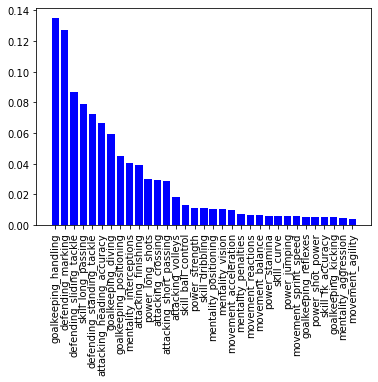

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("변수 중요도(xgboost)")
for f in range(data.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, data.columns[indices][f], importances[indices[f]]))
print()

plt.figure()
plt.bar(range(data.shape[1]), importances[indices],
        color="b",align="center")
plt.xticks(range(data.shape[1]), data.columns[indices], rotation=90)
plt.show()

다양한 과정을 통해 스탯 데이터를 통한 포지션 분류를 진행하였습니다.

대체적으로 골키퍼 포지션을 오분류한 경우는 없었으나, 수비수-미드필더, 미드필더-공격수를 오분류한 경우가 많았습니다.

대체적으로 각 포지션에서 중요하게 판단되는 스탯, 능력은 그 포지션에 특화된 능력임을 알 수 있었습니다.